# Predicting School Failure in the UK with scikit-learn
Data taken from [Ofsted](https://reports.ofsted.gov.uk/)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import re
# Get all most recent closed files
patterns = ["progress","teaching","work","well","The","provision","this","This","Children","enqiures uk", "the", "learning", "staff", "good", "ir", "inspection", "the", "schools", "children", "pupils", "school", "pupil", "Ofsted", "Inspection report", "gov uk", "ofsted gov", "early year", "uk government", "www.ofsted.gov.uk", "www.gov.uk/ofsted", "Early Year", "ofsted", "gov", "Inspection Report"] # filter out common words
closed_school_names = []
closed = []
closed_root = './schools/closed/'
for path, subdirs, files in os.walk(closed_root):
    for s in subdirs:
        f = os.path.join(path,s)
        reports = ""
        for p2, s2, f2 in os.walk(f):
            for file in f2:
                if file == '':
                    continue
                txt = open(os.path.join(p2,str(file)),"r")
                content = txt.read()
                if re.search("childminder",content,re.IGNORECASE):
                    continue
                for pattern in patterns:
                    content = content.replace(pattern,'')
                content = content.replace('\n','')
                reports += content
        if reports != "":
            closed.append(reports)
            closed_school_names.append(s)

In [5]:
# Get all most recent open files
patterns = ["progress","teaching","work","well","The","provision","this","This","Children","enqiures uk", "the", "learning", "staff", "good", "ir", "inspection", "the", "schools", "children", "pupils", "school", "pupil", "Ofsted", "Inspection report", "gov uk", "ofsted gov", "early year", "uk government", "www.ofsted.gov.uk", "www.gov.uk/ofsted", "Early Year", "ofsted", "gov", "Inspection Report"] # filter out common words
opened = []
open_school_names = []
open_root = './schools/open/'
for path, subdirs, files in os.walk(open_root):
    for s in subdirs:
        f = os.path.join(path,s)
        reports = ""
        for p2, s2, f2 in os.walk(f):
            for file in f2:
                if file == '':
                    continue
                txt = open(os.path.join(p2,str(file)),"r")
                content = txt.read()
                if re.search("childminder",content,re.IGNORECASE):
                    continue
                for pattern in patterns:
                    content = content.replace(pattern,'')
                content = content.replace('\n','')
                reports += content
        if reports != "":
            opened.append(reports)
            open_school_names.append(s)

In [6]:
import pandas as pd
df_closed = pd.DataFrame()
closed_labels = ["closed" for school in closed]
df_closed["school"] = closed_school_names
df_closed["text"] = closed
df_closed["label"] = closed_labels

In [7]:
df_closed.head()

school  \
0                      Tweeddale Primary School   
1    Loganberries Childcare And Tutoring Closed   
2  Dovedale Before and After School Club Closed   
3                                Pepe & Friends   
4      Cottonstones Pre-School Playgroup Closed   

                                                text   label  
0     Existing academy: Tweeddale Primary SchoolU...  closed  
1      Loganberries Childcare And Tutoring    Hol...  closed  
2      Dovedale Before and After School Club    D...  closed  
3  Pepe & Friends16 Skylines Village, Limeharbour...  closed  
4  UntitledCottonstones Pre-School Playgroup for ...  closed

In [8]:
# Filter out schools that were marked as closed due to academy conversion
import numpy as np
df_closed = df_closed.replace(np.nan, '', regex=True)
df_closed = df_closed[~df_closed.text.apply(lambda x: bool(re.search("academy converters",x,re.IGNORECASE)))]

In [9]:
df_open = pd.DataFrame()
open_labels = ["open" for school in opened]
df_open["school"] = open_school_names
df_open["text"] = opened
df_open["label"] = open_labels

In [10]:
df_open.head()

school  \
0                           Tweeddale Primary School   
1  Redcliffe Childrens Centre and Maintained Nurs...   
2                                       Magpies West   
3  St John's Church of England Primary School, La...   
4                         Stoneydelph Primary School   

                                                text label  
0     Existing academy: Tweeddale Primary SchoolU...  open  
1  Aviation House125 KingswayLondonWC2B  6SET 030...  open  
2      Magpies West    West Kidlington Primary Sc...  open  
3     Existing academy: St John's Church of Engla...  open  
4  Existing academy: Stoneydelph Primary SchoolUR...  open

In [11]:
df = df_closed.append(df_open, ignore_index=True)
df.label.unique()

array(['closed', 'open'], dtype=object)

In [12]:
df.head()

school  \
0         Loganberries Childcare And Tutoring Closed   
1       Dovedale Before and After School Club Closed   
2                                     Pepe & Friends   
3           Cottonstones Pre-School Playgroup Closed   
4  St Mary and St John Junior and Infant School C...   

                                                text   label  
0      Loganberries Childcare And Tutoring    Hol...  closed  
1      Dovedale Before and After School Club    D...  closed  
2  Pepe & Friends16 Skylines Village, Limeharbour...  closed  
3  UntitledCottonstones Pre-School Playgroup for ...  closed  
4   School report      St Mary and St John Junior...  closed

In [13]:
print ("Total number of closed schools: {}".format(len(closed)))
print ("Total number of open schools: {}".format(len(opened)))

Total number of closed schools: 23846
Total number of open schools: 48205


In [14]:
print ("Closed schools after filtering for academy converters: {}".format(len(df_closed))) # 530 after filtering out academy converter
print ("Open schools: {}".format(len(df_open)))

Closed schools after filtering for academy converters: 21596
Open schools: 48205


In [15]:
# !pip install wordcloud

In [16]:
# from wordcloud import WordCloud
# import PIL
# import itertools
# import matplotlib.pyplot as plt

# targets = ['text']

# l1 = df_closed['text'].values.tolist()
# l2 = df_open['text'].values.tolist()
# school_categories = [l1, l2]

# for schools,target in zip(school_categories, targets):
#   raw_str = df[target].str.cat(sep=',')
#   wordcloud = WordCloud( max_words=1000,margin=0).generate(raw_str)
#   plt.figure()
#   plt.imshow(wordcloud, interpolation="bilinear")
#   plt.axis("off")
#   plt.show()

# for o_schools,target in zip(l2, targets):
#   raw_str = df_open[target].str.cat(sep=',')
#   wordcloud = WordCloud(max_words=1000,margin=0).generate(raw_str)
#   plt.figure()
#   plt.imshow(wordcloud, interpolation="bilinear")
#   plt.axis("off")
#   plt.show()

# for c_schools,target in zip(l1, targets):
#   raw_str = df_closed[target].str.cat(sep=',')
#   wordcloud = WordCloud(max_words=1000,margin=0).generate(raw_str)
#   plt.figure()
#   plt.imshow(wordcloud, interpolation="bilinear")
#   plt.axis("off")
#   plt.show()

In [17]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ") # Clean up non-alphabetical symbols
import numpy as np
df = df.replace(np.nan, '', regex=True)

In [18]:
# Clean up stopwords
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vcabales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df.head()

school  \
0         Loganberries Childcare And Tutoring Closed   
1       Dovedale Before and After School Club Closed   
2                                     Pepe & Friends   
3           Cottonstones Pre-School Playgroup Closed   
4  St Mary and St John Junior and Infant School C...   

                                                text   label  
0  Loganberries Childcare And Tutoring Holy Spit ...  closed  
1  Dovedale Before After School Club Dovedale Pri...  closed  
2  Pepe Friends Skylines Village Limeharbour LOND...  closed  
3  UntitledCottonstones Pre School Playgroup Uniq...  closed  
4  School report St Mary St John Junior Infant Sc...  closed

In [20]:
from sklearn.model_selection import train_test_split # Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.33, random_state=42) 
# y_train and y_test are lists of labels

In [21]:
X_train.shape

(46766,)

In [22]:
X_test.shape

(23035,)

In [23]:
y_train.shape

(46766,)

In [24]:
# Tokenize the words - CountVectorizer filters out stopwords, previous step might have been unnecessary
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features=5)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(46766, 5)

In [25]:
# Transform testing data with CountVectorizer, use later to check for overfitting / underfitting
test_features = count_vect.transform(X_test)

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
X_train_tfidf = TfidfTransformer(smooth_idf=True,use_idf=True)
X_train_tfidf.fit(X_train_counts)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [27]:
# print idf values
df_idf = pd.DataFrame(X_train_tfidf.idf_, index=count_vect.get_feature_names(),columns=["tf_idf_weights"])
df_idf.sort_values(by=['tf_idf_weights'])
# the lower the idf value, the less unique the word is (meaning that the word appears more frequently)

tf_idf_weights
quality          1.078042
support          1.079615
skills           1.081214
standards        1.092151
year             1.198762

In [28]:
X_train_dtm = count_vect.transform(X_train)

In [29]:
# Use dummy classifier to get a baseline
from sklearn.dummy import DummyClassifier 
baseline = DummyClassifier().fit(X_train_dtm, y_train)

In [30]:
y_pred_class_baseline = baseline.predict(test_features)

In [31]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class_baseline) # Record baseline accuracy

0.5709572389841545

In [32]:
metrics.confusion_matrix(y_test, y_pred_class_baseline)

array([[ 2156,  4907],
       [ 4976, 10996]])

In [33]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['closed','open']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 2156  4907]
 [ 4976 10996]]
Normalized confusion matrix
[[0.31 0.69]
 [0.31 0.69]]


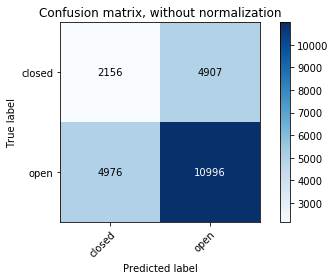

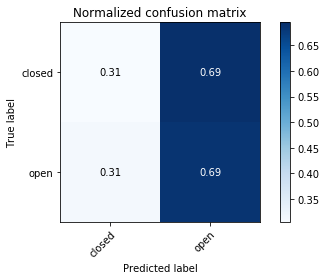

In [34]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_baseline, classes=['closed','open'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_baseline, classes=['closed','open'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [35]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB().fit(X_train_dtm, y_train)

In [36]:
# Make predictions with testing features from X_test
y_pred_class_multi_nb = multi_nb.predict(test_features)

In [37]:
metrics.accuracy_score(y_test, y_pred_class_multi_nb)

0.6559583242891253

In [38]:
# examine class distribution
print(y_test.value_counts())
# there is a majority class of 0 here, hence the classes are skewed

# calculate null accuracy (for multi-class classification problems)
# .head(1) assesses the value 1208
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)

# Manual calculation of null accuracy by always predicting the majority class
print('Manual null accuracy:',(1208 / (1208 + 185)))

open      15972
closed     7063
Name: label, dtype: int64
Null accuracy: open    0.69338
Name: label, dtype: float64
Manual null accuracy: 0.8671931083991385


In [39]:
metrics.confusion_matrix(y_test, y_pred_class_multi_nb)

array([[ 2481,  4582],
       [ 3343, 12629]])

Confusion matrix, without normalization
[[ 2481  4582]
 [ 3343 12629]]
Normalized confusion matrix
[[0.35 0.65]
 [0.21 0.79]]


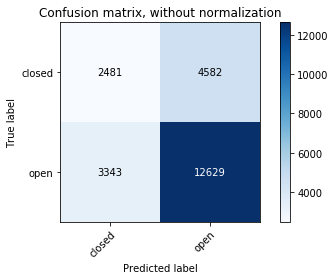

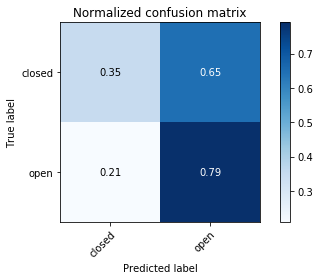

In [40]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_multi_nb, classes=['closed','open'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_multi_nb, classes=['closed','open'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [41]:
X_test[y_pred_class_multi_nb > y_test]

20290    home Unique reference number SC Inspection dat...
5929     Maples Centre Unique Reference Number EY Inspe...
15006    CRL V Our Reference EY Childcare Register outc...
2180     M L H St John School Unique reference number E...
5897     Suffolk Norfolk Graduate Teacher ProgrammeInit...
19900    Crown copyright Website document may reproduce...
13912    Littlebrook Nursery Oaklands Park Wick Lane Eg...
2165     UntitledSouth Pre School Unique Reference Numb...
14502    DAY CARE INSPECTION REPORTURN EY INSPECTION DE...
8363     Dear Parent Sholing Infant School interim asse...
625      ANNUAL ASSESSMENT VISIT MAIN FINDINGSName Coll...
17313    School report West Park Primary School Coniscl...
8492     Greenside Nursery Unique reference number EY I...
3186     School report Fwood High School Stitch Mi Lane...
5476     PDFINSPECTION REPORTWESTBROOKE SPECIAL SCHOOLW...
2359     Chips Thorn Grove SchoolThorn Grove Primary Sc...
14132    UntitledAngel Day Nursery Unique Reference Num.

In [58]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    print

    for coef, feat in (topn_class2):
        print (class_labels[1], coef, feat)

In [59]:
most_informative_feature_for_binary_classification(count_vect, multi_nb)

closed -1.6197424688280382 standards
closed -1.6136419612345136 skills
closed -1.6109813178774477 support
closed -1.606249569723964 year
closed -1.5967234304881366 quality
open -1.6197424688280382 standards
open -1.6136419612345136 skills
open -1.6109813178774477 support
open -1.606249569723964 year
open -1.5967234304881366 quality


In [44]:
import pickle
pickle.dump(multi_nb, open('multi_nb.pkl','wb'))

In [45]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_train)
km = KMeans(n_clusters=2, max_iter=1000)
km.fit(X)
clusters = km.labels_.tolist()

In [46]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 pupils
 teachers
 students
 year
 lessons
 average
 school
 make
 skills
 standards
Cluster 1:
 childcare
 nursery
 care
 parents
 staff
 quality
 registered
 setting
 act
 standards


Prediction


In [47]:
Y = vectorizer.transform(X_test)
prediction = km.predict(Y)
print(prediction)

[1 1 1 ... 1 1 0]


In [ ]:
import seaborn as sns; sns.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1], c=prediction, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5);

In [ ]:
# Evaluate kmeans with elbow method
sse = []
list_k = list(range(1,10))

for k in list_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6,6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [60]:
!pip install yellowbrick

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


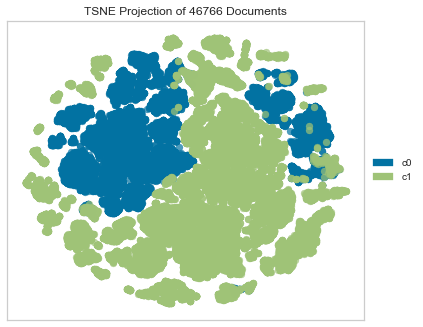

In [62]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer()
tsne.fit(X, ["c{}".format(c) for c in clusters])
tsne.poof()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


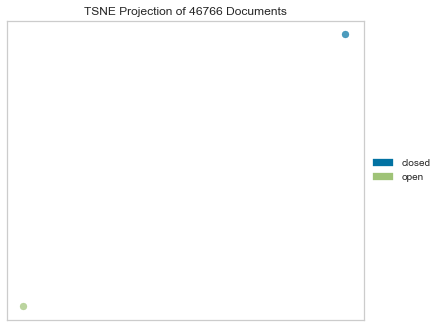

In [63]:
tsne_labels = TSNEVisualizer()
labels = ['closed','open']
tsne_labels.fit(X, labels)
tsne_labels.poof()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


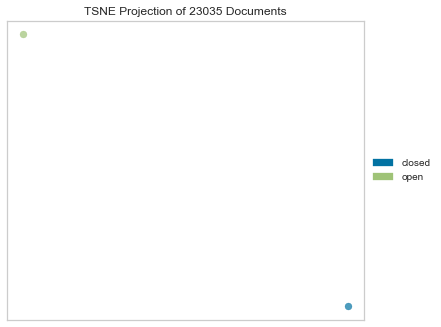

In [64]:
tsne_y = TSNEVisualizer()
tsne_y.fit(Y, labels)
tsne_y.poof()

In [65]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=5, 
    random_state=0)
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [66]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [67]:
no_top_words = 10
display_topics(lda, vectorizer.get_feature_names(), no_top_words)

Topic 0:
parents quality pupils standards skills school care nursery needs support
Topic 1:
slb astha clw tek pwc archon clr damar punnetts indigoskills
Topic 2:
fshc fortan gdn lawtrain headjogs kdts laccat tads jewson rwp
Topic 3:
frp alpington eastlands bergh kiara lfe wyevale emap tlz skandia
Topic 4:
academy predecessor converter converters conversion schoolurn faqs secretary new closed


In [68]:
!pip install pyldavis

    100% |████████████████████████████████| 1.6MB 7.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/cd/c1/50a758e8247561e58cb87305b1e90b171b8c767b15b12a1734001f41d356/joblib-0.13.2-py2.py3-none-any.whl
  Stored in directory: /Users/vcabales/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [70]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)